In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"H:\Data\......\Twitter\twitter_training.csv")

In [3]:
data.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


1. Map sentiment labels to sentiment scores
2. Apply the mapping to create the 'Sentiment_Score' column

In [4]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1, 'Irrelevant': 0}
    
data['Sentiment_Score'] = data['Sentiment'].map(sentiment_mapping)

In [5]:
data.columns

Index(['TweetID', 'Entity', 'Sentiment', 'Tweet_Content', 'Sentiment_Score'], dtype='object')

In [6]:
sns.set(style="whitegrid")
sentiment_counts = data['Sentiment'].value_counts()

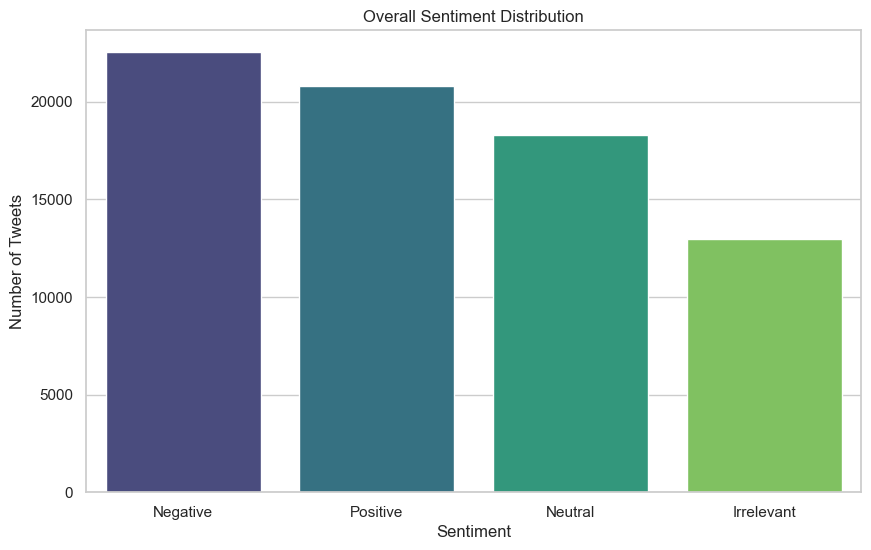

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

The bar chart above shows the overall distribution of sentiments in the dataset. To delve deeper, we can visualize the sentiment distribution for each entity (brand or topic) separately. This will help us understand public opinion and attitudes towards specific entities.

In [8]:
selected_entities = data['Entity'].value_counts().index[:5]

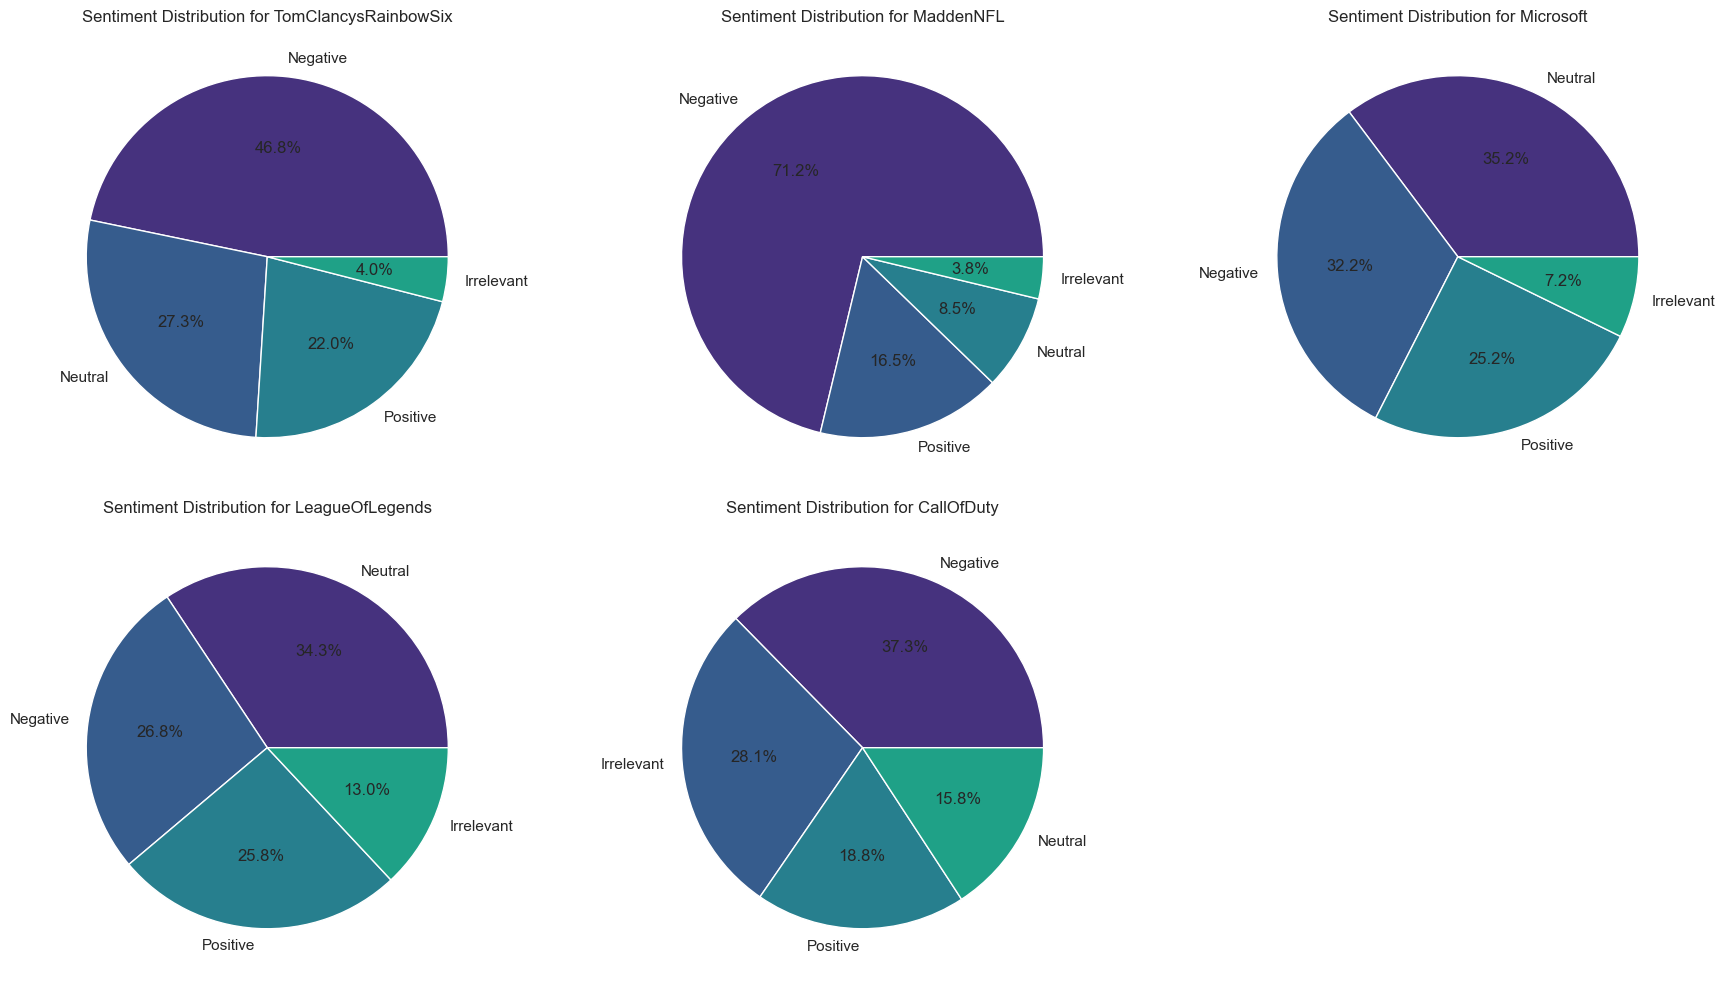

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for idx, entity in enumerate(selected_entities):
    ax = axes[idx//3, idx%3]
    entity_data = data[data['Entity'] == entity]
    entity_sentiment_counts = entity_data['Sentiment'].value_counts()
    
    ax.pie(entity_sentiment_counts, labels=entity_sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    ax.set_title(f'Sentiment Distribution for {entity}')
    
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

1. Almost 3/4th of the tweets from 'MaddenNFL' was categorized as negative out of these 5 entities from the data.
2. Overall almost 50 percent of tweets from 'TomClancysRainbowSix' were found to be negative in sentiment.
3. If we observe carefully we can see the proportion of postive sentiment tweets were significantly lesser than the negative sentiment tweets from above all 5 entities.

Grouping by entity and sentiment

In [10]:
entity_sentiment_counts = data.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

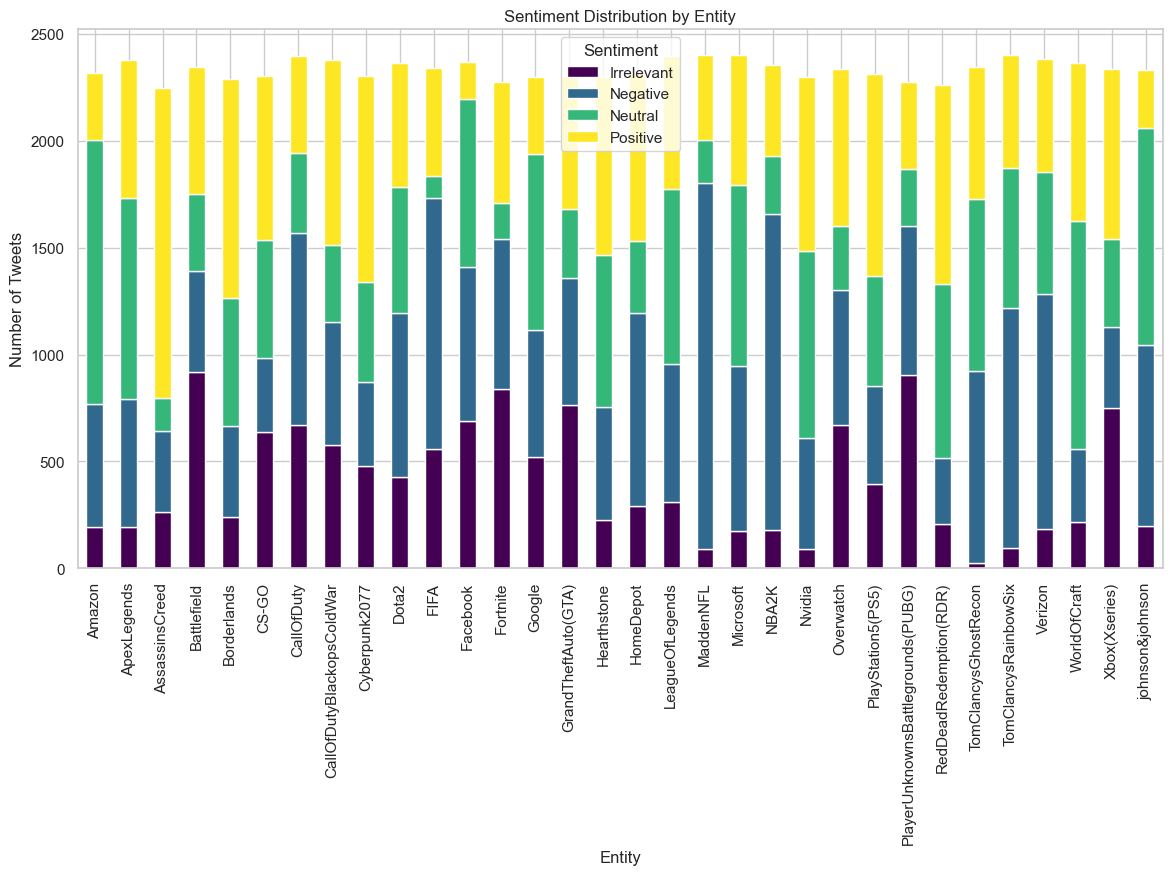

In [11]:
entity_sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()

1. Maximum number of tweets of positive sentiment were done by AssassinsCreed.
2. Maximum number of tweets of negative sentiment were done by MaddenNFL.
3. Facebook had the least number of tweets of positive sentiment.
4. ReadDeadRedempion(RDR) entity had the least number of tweets of negative sentiment.
5. Fifa had the least number of tweets of neutral sentiment.
6. Amazon had the maximum number of tweets of neutral sentiment.

In [12]:
heatmap_data = data.pivot_table(index='Entity', columns='Sentiment', aggfunc='size', fill_value=0)

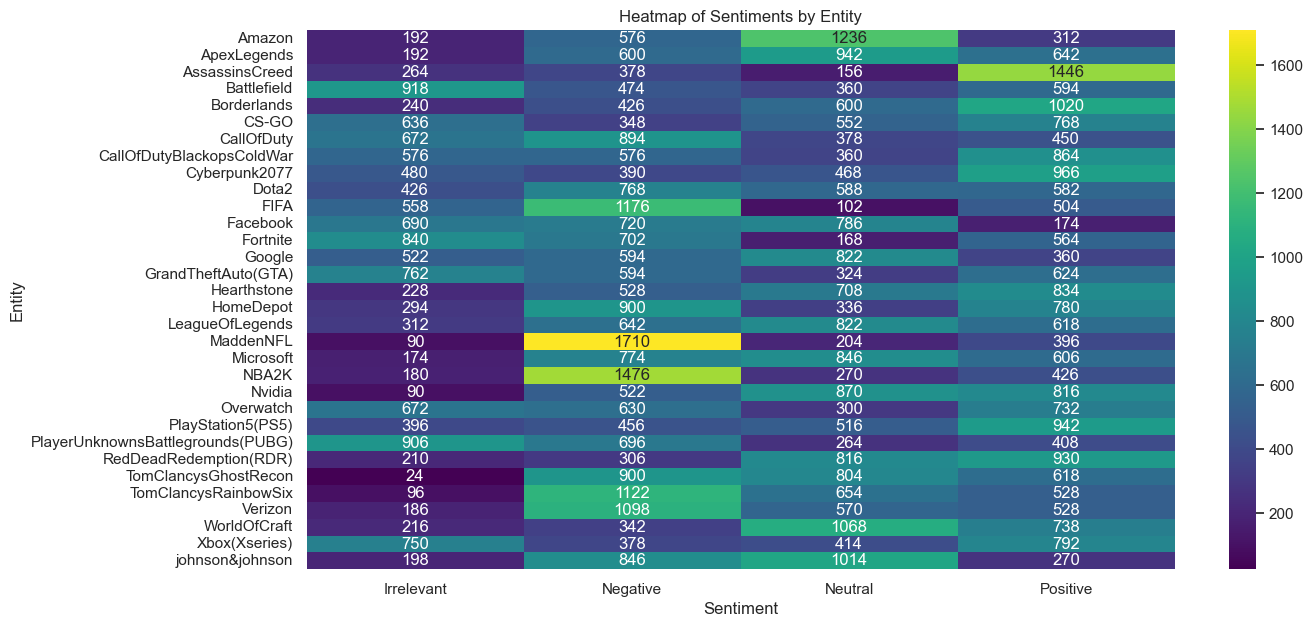

In [13]:
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Sentiments by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

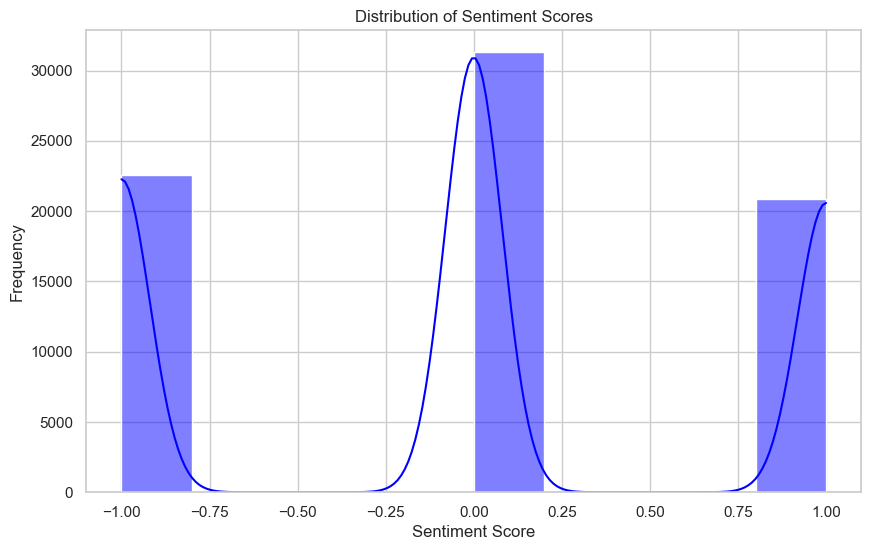

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Maximum tweets were found to be of neutral and irrelevant sentiment followed by negative and then the least number of tweets were of positive sentiment.